In [1]:
import re 
import pandas as pd
try:
    import cPickle as pickle
except ImportError:
    import pickle  
import numpy as np

In [2]:
#function to convert emojis to text 
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","  ").replace(":","  ").split()), text)
    return text 


In [3]:
#instead of removing emojis, converts them to text 
df=pd.read_excel('Copy of Bot Data.xlsx')

#convert text to lower case 
df['biography']=df['biography'].str.lower()
df['comment']=df['comment'].str.lower()

#expand contractions 
contractions_dict = {"aren't": "are not", "don't": "do not", "Don't": "do not", "I'm": "I am", "i'm": "I am", 
                    "it's": "it is", "y'all": "you all", "Y'all": "you all", "didn't": "did not", "won't": "will not",
                   "I'll": "I will", "i'll": "I will", "can't": "can not"}
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text, expand_dict):
    def replace(match):
        return expand_dict[match.group(0)]
    return contractions_re.sub(replace, text)
df['biography']=df['biography'].apply(lambda x:expand_contractions(x, contractions_dict ))
df['comment']=df['comment'].apply(lambda x:expand_contractions(x, contractions_dict))

bios=df['biography'].astype(str)
usernames=df['Username']
comments=df['comment']
new_bios=[]
for b in bios: 
    temp=convert_emojis_to_word(b)
    new_bios.append(temp)
new_comments=[]
for c in comments:
    temp=convert_emojis_to_word(c)
    new_comments.append(temp)
df_filtered=df.copy()
df_filtered['biography']=new_bios
df_filtered['comment']=new_comments
df_filtered

,Username,Follower Count,Following Count,Follower/Following Ratio,Number of posts,biography,# of likes on comment,comment,time of comment after post (minutes),"bot classification (0-not a bot, 1-bot)"
0,alyseaa_kyyy,28,405,0.069136,5,more videos uncensored\nbackhand_index_pointin...,0,do not look at my story!!!firefirefire,8,1
1,bellafreakyxo,858,834,1.028777,3,bella🧸 she/xe\n19 | florida palm_tree\nmessage...,0,"dm me for a fr***y vid, and tell me how long y...",1,1
2,jeniver.f,16,131,0.122137,0,jeniver.f\nright_arrow_curving_down️right_arro...,0,do not judge me after u saw my storiesloudly_c...,1,1
3,deanna__ward,244,289,0.844291,8,deanna ward\nhot storyno_one_under_eighteen\ns...,0,smiling_face_with_heart-eyesi am always lookin...,1,1
4,briana.nastyy,32,155,0.206452,1,briana.nastyy\npolite-lily-69612e.netlify.app,1,do not judge me after view my stories babe..lo...,1,1
...,...,...,...,...,...,...,...,...,...,...
309,cyreloo,4989,2162,2.307586,1533,"pe/nga/ocb/wnbf/worlds physique pro champion, ...",28,that was tough from jt.. he went off tonight.....,4,0
310,gttm.lew,250,83,3.012048,5,new pagethumbs_downdark_skin_tone\nmoneyminded...,2,playoff al,5,0
311,guiimfr,1043,861,1.211382,17,the show must go on smiling_face_with_sunglass...,135,celtics vs the refs and we still won loooollll...,4,0
312,roncho.385,1170,503,2.326044,0,anti-social black_heart♟\ndeuteronomy 20:4,15,still one of the worst games i ever seen horri...,7,0


In [4]:
#remove emojis that couldn't be converted and remove new line characters
from cleantext import clean

new_bios=[]
for b in df_filtered['biography']: 
    temp=clean(b, no_emoji=True)
    temp=temp.replace("\n", " ")
    if temp=='':
        new_bios.append('None')
    else: 
        new_bios.append(temp)
new_comments=[]
for c in df_filtered['comment']:
    temp=clean(c, no_emoji=True)
    temp=temp.replace("\n", " ")
    if temp=='':
        new_comments.append('None')
    else: 
        new_comments.append(temp)
df_filtered['biography']=new_bios
df_filtered['comment']=new_comments


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [5]:
df_filtered['combined']=df_filtered['biography'] + ' ' + df_filtered['comment']


from sklearn.model_selection import train_test_split
#train and test set split 
train_set, test_set= train_test_split(
df_filtered, test_size=.2, random_state=10)
df_filtered

,Username,Follower Count,Following Count,Follower/Following Ratio,Number of posts,biography,# of likes on comment,comment,time of comment after post (minutes),"bot classification (0-not a bot, 1-bot)",combined
0,alyseaa_kyyy,28,405,0.069136,5,more videos uncensored backhand_index_pointing...,0,do not look at my story!!!firefirefire,8,1,more videos uncensored backhand_index_pointing...
1,bellafreakyxo,858,834,1.028777,3,bella she/xe 19 | florida palm_tree message me...,0,"dm me for a fr***y vid, and tell me how long y...",1,1,bella she/xe 19 | florida palm_tree message me...
2,jeniver.f,16,131,0.122137,0,jeniver.f right_arrow_curving_downright_arrow_...,0,do not judge me after u saw my storiesloudly_c...,1,1,jeniver.f right_arrow_curving_downright_arrow_...
3,deanna__ward,244,289,0.844291,8,deanna ward hot storyno_one_under_eighteen spa...,0,smiling_face_with_heart-eyesi am always lookin...,1,1,deanna ward hot storyno_one_under_eighteen spa...
4,briana.nastyy,32,155,0.206452,1,briana.nastyy polite-lily-69612e.netlify.app,1,do not judge me after view my stories babe..lo...,1,1,briana.nastyy polite-lily-69612e.netlify.app d...
...,...,...,...,...,...,...,...,...,...,...,...
309,cyreloo,4989,2162,2.307586,1533,"pe/nga/ocb/wnbf/worlds physique pro champion, ...",28,that was tough from jt.. he went off tonight.....,4,0,"pe/nga/ocb/wnbf/worlds physique pro champion, ..."
310,gttm.lew,250,83,3.012048,5,new pagethumbs_downdark_skin_tone moneymindedm...,2,playoff al,5,0,new pagethumbs_downdark_skin_tone moneymindedm...
311,guiimfr,1043,861,1.211382,17,the show must go on smiling_face_with_sunglass...,135,celtics vs the refs and we still won loooollll...,4,0,the show must go on smiling_face_with_sunglass...
312,roncho.385,1170,503,2.326044,0,anti-social black_heart deuteronomy 20:4,15,still one of the worst games i ever seen horri...,7,0,anti-social black_heart deuteronomy 20:4 still...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
vectorizer1.fit(train_set['combined'])
tfidf_array =  vectorizer1.transform(train_set['combined']).toarray()
text_df = pd.DataFrame(data=tfidf_array,columns = vectorizer1.get_feature_names())
text_df

,0,000,000money_bag,0381,05,0598,064acf,09,1,10,...,youtu,youtube,yt,zainab,zainabzilahi,zeldon,zero,zilahi,zooming,zu
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.186643,0.0,0.0,0.138543,0.14231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0.0,0.137067,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#normalize training data set 
train_set_filtered=train_set[['Follower Count', 'Following Count',
       'Follower/Following Ratio', 'Number of posts', '# of likes on comment ', 'time of comment after post (minutes)', 'bot classification (0-not a bot, 1-bot)']]
df_normalized=train_set_filtered.copy()
numerical_cols=['Follower Count', 'Following Count',
       'Follower/Following Ratio', 'Number of posts', '# of likes on comment ', 'time of comment after post (minutes)']
for c in numerical_cols:
    df_normalized[c]= (train_set_filtered[c] - train_set_filtered[c].min()) / (train_set_filtered[c].max() - train_set_filtered[c].min())
    
#merge normalized numerical values with dataframes containing text classification features 
df_normalized=df_normalized.reset_index(drop=True)
df_combined=pd.concat([text_df, df_normalized], axis=1)
df_combined.replace([np.inf, -np.inf], np.nan, inplace=True)
df_combined=df_combined.dropna()
X_train=df_combined.drop(['bot classification (0-not a bot, 1-bot)'], axis=1)
Y_train=df_combined['bot classification (0-not a bot, 1-bot)']


In [8]:
#normalize the test set 
test_normalized=test_set.copy()
test_normalized=test_normalized[['Follower Count', 'Following Count',
       'Follower/Following Ratio', 'Number of posts', '# of likes on comment ', 'time of comment after post (minutes)', 'bot classification (0-not a bot, 1-bot)']]
for c in numerical_cols: 
    test_normalized[c]= (test_normalized[c] - test_normalized[c].min()) / (test_normalized[c].max() - test_normalized[c].min())  
test_normalized=test_normalized.reset_index(drop=True)

In [9]:
#convert the text columns to arrays and merge dataframes for the test set 
text_array_test = vectorizer1.transform(test_set['combined']).toarray()
text_df_test = pd.DataFrame(data=text_array_test,columns = vectorizer1.get_feature_names())
df_combined_test=pd.concat([text_df_test, test_normalized], axis=1)
df_combined_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_combined_test=df_combined_test.dropna()
X_test=df_combined_test.drop(['bot classification (0-not a bot, 1-bot)'], axis=1)
Y_test=df_combined_test['bot classification (0-not a bot, 1-bot)']
X_test

,0,000,000money_bag,0381,05,0598,064acf,09,1,10,...,zero,zilahi,zooming,zu,Follower Count,Following Count,Follower/Following Ratio,Number of posts,# of likes on comment,time of comment after post (minutes)
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.006700,0.069102,0.011358,0.013463,0.000000,0.222222
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.002564,0.561191,0.000538,0.158858,1.000000,0.055556
2,0.0,0.21747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.009615,0.025128,0.044783,0.000000,0.000000,0.037037
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000054,0.062355,0.000138,0.000000,0.218182,0.000000
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.008143,0.000284,0.001077,0.000000,0.037037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.001816,0.196370,0.001092,0.000000,0.000000,0.037037
59,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000357,0.010935,0.004024,0.003231,0.095455,0.055556
60,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.006337,0.367148,0.002022,0.005924,0.000000,0.037037
61,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000909,0.103071,0.001053,0.010770,0.000000,0.074074


In [10]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)
print("Accuracy:", score)


Accuracy: 0.9206349206349206


In [11]:
#apply a low variance filter 
# cols= text_df.columns
# variance1 = text_df.var()
# filtered_cols1 = [ ]
# for i in range(0,len(variance1)):
#     if variance1[i]>=0.006: #threshold for variance is 1%, don't want to include constant variables
#         filtered_cols1.append(cols[i])
# # filtered_cols = cols, so none of the remaining columns are constant with a variance of 0
# text_df=text_df[filtered_cols1]
# text_df

In [12]:
#from here, try RFE 
#trying RFE for feature selection
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
selector1=RFE(estimator=model, n_features_to_select=50, step=1) #chose arbitrarily to select 50 of the most important words out of 2000 to make it more manageable

#split dataset into features and labels
Y1=train_set['bot classification (0-not a bot, 1-bot)']
X1=text_df

#run RFE
rfe1 = selector1.fit_transform(X1, Y1)
filter1=(selector1.get_support())

##
#filter columns using data from RFE
filter1=list(filter1)
current_cols = list(X1.columns)

#figure out which columns to keep
important_cols=[]
for index in range(len(filter1)):
    if (filter1[index])==True:
        important_cols.append(current_cols[index])
important_cols

['000',
 '24',
 '5',
 'account',
 'after',
 'alive',
 'am',
 'app',
 'athlete',
 'bf',
 'bio',
 'charlotte_empire',
 'chart_increasing',
 'click',
 'content',
 'contentno_one_under_eighteen',
 'cutt',
 'debts',
 'dm',
 'do',
 'eyes',
 'first',
 'for',
 'he',
 'hit',
 'i',
 'linkr',
 'ly',
 'm',
 'me',
 'money_bag',
 'my',
 'netlify',
 'new',
 'paying',
 'people',
 'round_pushpin',
 'sparkles',
 'sports',
 'stories',
 'story',
 'that',
 'the',
 'they',
 'to',
 'usa',
 'what',
 'with',
 'y',
 'you']

In [36]:
features_filtered=X1[important_cols]
#merge with original numerical columns
features_filtered=pd.concat([features_filtered, df_normalized], axis=1)
X_train=features_filtered.drop(['bot classification (0-not a bot, 1-bot)'], axis=1)
Y_train=features_filtered['bot classification (0-not a bot, 1-bot)']

#filter test set for important columns 
text_df_test=text_df_test[important_cols]
df_combined_test=pd.concat([text_df_test, test_normalized], axis=1)
df_combined_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_combined_test=df_combined_test.dropna()
X_test=df_combined_test.drop(['bot classification (0-not a bot, 1-bot)'], axis=1)
Y_test=df_combined_test['bot classification (0-not a bot, 1-bot)']

#redo logistic regression with filtered columns
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
score = classifier.score(X_test, Y_test)
print("Accuracy:", score)


Accuracy: 0.9206349206349206


In [27]:
#K-fold cross validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
LR = LogisticRegression(max_iter=1000)
cv = KFold(n_splits=5, shuffle=True)
result = cross_val_score(LR, X_train, Y_train, cv=cv, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (mean(result), std(result)))


Accuracy: 0.944 (0.029)


In [30]:
#Model2
#fast model for classification that's easy to train
#not very sensitive to noise or to overfitting
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
cv2 = KFold(n_splits=5, shuffle=True)
result2 = cross_val_score(NB, X_train, Y_train, cv=cv2, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (mean(result2), std(result2)))


Accuracy: 0.920 (0.062)


In [35]:
#model 3 
from sklearn.svm import SVC
SVC_model = SVC()
cv3 = KFold(n_splits=5, shuffle=True)
result3 = cross_val_score(SVC_model, X_train, Y_train, cv=cv3, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (mean(result3), std(result3)))

Accuracy: 0.940 (0.025)


In [17]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
h_model=LogisticRegression(max_iter=1000)
grid = dict()
grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
grid['penalty'] = ['l1', 'l2', 'none']
grid['C'] = np.logspace(-4, 4, 10) #range of values to test
grid_search = GridSearchCV(h_model, grid, cv = 5, scoring = 'accuracy',n_jobs=-1, verbose=True)
final= grid_search.fit(X_train, Y_train)
print('Best Score: %s' % final.best_score_)
print('Best Hyperparameters: %s' % final.best_params_)
final_model = final.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s


Best Score: 0.9641568627450979
Best Hyperparameters: {'C': 2.782559402207126, 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.3s finished


In [18]:
#looking at feature importance
importance = final_model.coef_[0]
indices = (-importance).argsort()[:5]
col_names=X_test.columns.tolist()
important_features = [col_names[i] for i in indices]
important_features

['my', 'me', 'app', 'netlify', 'bio']

In [19]:
LR_prediction=final_model.predict(X_test)
print(confusion_matrix(LR_prediction, Y_test))
print(classification_report(LR_prediction, Y_test))

[[33  4]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        37
           1       0.86      0.96      0.91        26

    accuracy                           0.92        63
   macro avg       0.92      0.93      0.92        63
weighted avg       0.93      0.92      0.92        63



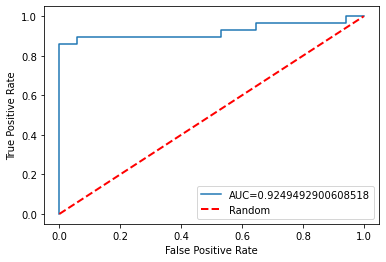

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#AUC plot to validate model 
from sklearn.metrics import roc_curve, roc_auc_score
y_preds = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test,  y_preds)
auc = roc_auc_score(Y_test, y_preds)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

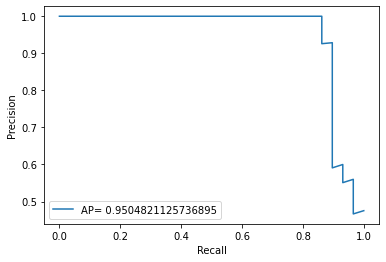

In [21]:
#plot pr curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_preds)
from sklearn.metrics import average_precision_score
AP=average_precision_score(Y_test, y_preds)
plt.plot(recall, precision, label="AP= "+str(AP))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=3)

In [37]:
#save model 
import joblib
filename = 'final_model.sav'
joblib.dump(model, filename)

['final_model.sav']